In [0]:
!unzip myData.zip

Streaming output truncated to the last 5000 lines.
 extracting: myData/5/5_13245_1577672002.0768187.png  
 extracting: myData/5/5_13246_1577672002.0768187.png  
 extracting: myData/5/5_13247_1577672002.0778143.png  
 extracting: myData/5/5_13248_1577672002.078812.png  
 extracting: myData/5/5_13249_1577672002.0798092.png  
 extracting: myData/5/5_13250_1577672002.0798092.png  
 extracting: myData/5/5_13251_1577672002.0808067.png  
 extracting: myData/5/5_13252_1577672002.0818043.png  
 extracting: myData/5/5_13253_1577672002.082801.png  
 extracting: myData/5/5_13254_1577672002.082801.png  
 extracting: myData/5/5_13255_1577672002.0837986.png  
 extracting: myData/5/5_13256_1577672002.084796.png  
 extracting: myData/5/5_13257_1577672002.0857933.png  
 extracting: myData/5/5_13258_1577672002.0857933.png  
 extracting: myData/5/5_13259_1577672002.0867918.png  
 extracting: myData/5/5_13260_1577672002.0877888.png  
 extracting: myData/5/5_13261_1577672002.0887861.png  
 extracting: myDat

Preprocessed Image


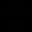

Class = [9]No passing
Probability = 97.96


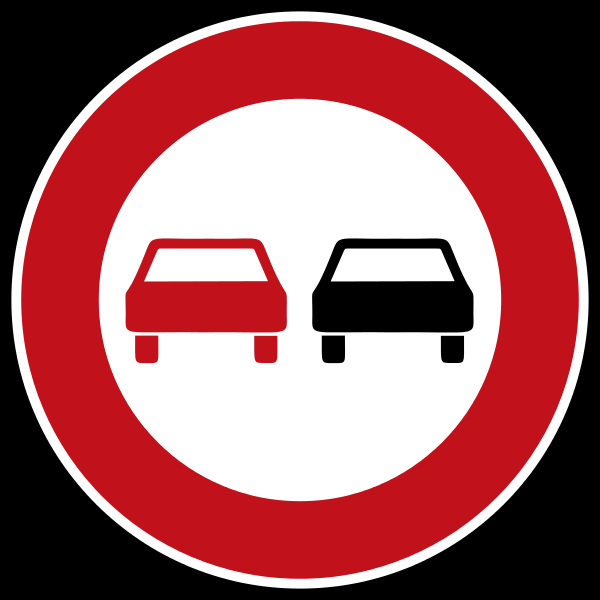

In [17]:
import numpy as np
import cv2
import pickle
from google.colab.patches import cv2_imshow
#############################################

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.059         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################

# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
pickle_in=open("/content/model_trained.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img    
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
#print(type(img))
#while True:

# READ IMAGE
#success, imgOrignal = cap.read()
imgOriginal = cv2.imread('NoPassing.png') 
# PROCESS IMAGE
img = np.asarray(imgOriginal)
img = cv2.resize(img, (32,32))
img = preprocessing(img)
print("Preprocessed Image")
cv2_imshow(img)
img = img.reshape(1, 32, 32, 1)
#cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:
    #print(getCalssName(classIndex))
    print("Class = " + str(classIndex) + str(getCalssName(classIndex)))

    print("Probability = " + str(round(probabilityValue*100,2)))
    #cv2.putText(img,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    #cv2.putText(img, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2_imshow(imgOriginal)